In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils
import math

In [3]:
underlying = pd.read_hdf('final_data.h5', 'underlying')

In [4]:
underlying2 = pd.read_hdf('../finalv2.h5', 'underlying')

In [5]:
diff = underlying - underlying2

In [6]:
underlying[(diff['30RV'] != 0) & (~diff['30RV'].isna())]['QUOTE_DATE'].to_list()

[Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-05 00:00:00'),
 Timestamp('2022-04-06 00:00:00'),
 Timestamp('2022-04-07 00:00:00'),
 Timestamp('2022-04-08 00:00:00'),
 Timestamp('2022-04-11 00:00:00'),
 Timestamp('2022-04-12 00:00:00'),
 Timestamp('2022-04-13 00:00:00'),
 Timestamp('2022-04-14 00:00:00'),
 Timestamp('2022-04-18 00:00:00'),
 Timestamp('2022-04-19 00:00:00'),
 Timestamp('2022-04-20 00:00:00'),
 Timestamp('2022-04-21 00:00:00'),
 Timestamp('2022-04-22 00:00:00'),
 Timestamp('2022-04-25 00:00:00'),
 Timestamp('2022-04-26 00:00:00'),
 Timestamp('2022-04-27 00:00:00'),
 Timestamp('2022-04-28 00:00:00'),
 Timestamp('2022-04-29 00:00:00'),
 Timestamp('2022-05-02 00:00:00'),
 Timestamp('2022-05-03 00:00:00'),
 Timestamp('2022-05-04 00:00:00'),
 Timestamp('2022-05-05 00:00:00'),
 Timestamp('2022-05-06 00:00:00'),
 Timestamp('2022-05-09 00:00:00'),
 Timestamp('2022-05-10 00:00:00'),
 Timestamp('2022-05-11 00:00:00'),
 Timestamp('2022-05-

In [4]:
underlying['RETURNS'] = underlying['RETURNS'] * 100

Text(0.5, 1.0, 'S&P 500')

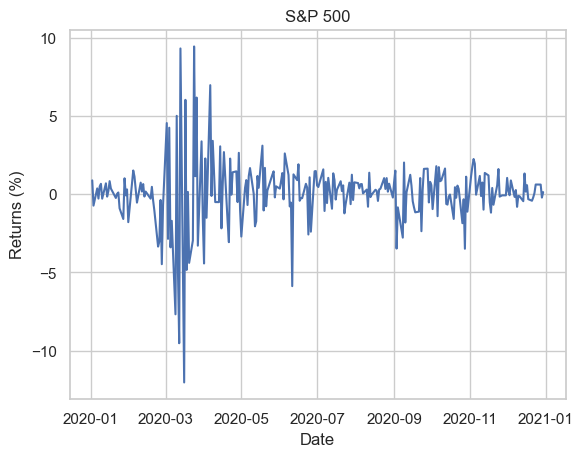

In [5]:
sns.set_theme(style='whitegrid')
ax = sns.lineplot(underlying[(underlying['QUOTE_DATE'] > '2020-01-01') & (underlying['QUOTE_DATE'] < '2020-12-31')], x='QUOTE_DATE', y='RETURNS')
ax.set_xlabel('Date')
ax.set_ylabel('Returns (%)')
ax.set_title('S&P 500')

In [9]:
underlying['RETURNS'] = underlying['RETURNS'] / 100

In [6]:
data = pd.read_hdf('final_data.h5', 'data')

In [8]:
data2 = pd.read_hdf('../finalv2.h5', 'data')

In [7]:
data

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,TTM,Moneyness,C_PRICE,TIME_IDX,RISK_FREE_RATE,30RV
0,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-01-07,1262898000,3.00,1.00000,0.00000,...,0.59859,NaN,183.0,0.162,0.008219,1.192621,182.500,0,0.005247,NaN
1,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-06-30,1277928000,176.96,0.94934,0.00053,...,0.31290,0.0,283.0,0.250,0.484817,1.332929,283.445,0,0.169749,NaN
2,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-06-30,1277928000,176.96,0.90576,0.00086,...,0.29397,0.0,233.0,0.206,0.484817,1.258878,238.055,0,0.169749,NaN
3,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-06-30,1277928000,176.96,0.85074,0.00125,...,0.27441,0.0,183.0,0.162,0.484817,1.192621,194.345,0,0.169749,NaN
4,1262638800,2010-01-04 16:00:00,2010-01-04,16.0,1132.99,2010-06-30,1277928000,176.96,0.78019,0.00165,...,0.25556,0.0,133.0,0.117,0.484817,1.132990,153.000,0,0.169749,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14919844,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.00,0.01813,0.00040,...,NaN,2.0,278.4,0.065,0.057534,0.939014,0.775,3463,3.903676,0.007635
14919845,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.00,0.01593,0.00029,...,NaN,1.0,283.4,0.066,0.057534,0.937987,0.700,3463,3.903676,0.007635
14919846,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.00,0.01393,0.00035,...,NaN,1.0,288.4,0.067,0.057534,0.936962,0.600,3463,3.903676,0.007635
14919847,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.00,0.02574,0.00048,...,NaN,5.0,258.4,0.060,0.057534,0.943146,1.175,3463,3.903676,0.007635


In [16]:
pd.concat([data, data2]).drop_duplicates(keep=False)

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,TTM,Moneyness,C_PRICE,TIME_IDX,RISK_FREE_RATE,30RV
11959118,1656705600,2022-07-01 16:00:00,2022-07-01,16.0,3826.19,2022-10-21,1666382400,112.0,0.00090,0.00005,...,NaN,0.0,1873.8,0.490,0.306849,0.671261,0.150,3150,2.011202,0.000069
11959119,1656705600,2022-07-01 16:00:00,2022-07-01,16.0,3826.19,2022-10-21,1666382400,112.0,0.00224,0.00001,...,NaN,0.0,1573.8,0.411,0.306849,0.708554,0.275,3150,2.011202,0.000069
11959120,1656705600,2022-07-01 16:00:00,2022-07-01,16.0,3826.19,2022-10-21,1666382400,112.0,0.00214,0.00004,...,NaN,0.0,1673.8,0.437,0.306849,0.695671,0.225,3150,2.011202,0.000069
11959121,1656705600,2022-07-01 16:00:00,2022-07-01,16.0,3826.19,2022-10-21,1666382400,112.0,0.00314,0.00004,...,NaN,0.0,1473.8,0.385,0.306849,0.721923,0.375,3150,2.011202,0.000069
11959122,1656705600,2022-07-01 16:00:00,2022-07-01,16.0,3826.19,2022-10-21,1666382400,112.0,0.00110,-0.00001,...,NaN,0.0,1773.8,0.464,0.306849,0.683248,0.175,3150,2.011202,0.000069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14919844,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.0,0.01813,0.00040,...,NaN,2.0,278.4,0.065,0.057534,0.939014,0.775,3463,3.903676,0.007635
14919845,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.0,0.01593,0.00029,...,NaN,1.0,283.4,0.066,0.057534,0.937987,0.700,3463,3.903676,0.007635
14919846,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.0,0.01393,0.00035,...,NaN,1.0,288.4,0.067,0.057534,0.936962,0.600,3463,3.903676,0.007635
14919847,1696017600,2023-09-29 16:00:00,2023-09-29,16.0,4286.60,2023-10-20,1697832000,21.0,0.02574,0.00048,...,NaN,5.0,258.4,0.060,0.057534,0.943146,1.175,3463,3.903676,0.007635


In [8]:
data = data[data['QUOTE_DATE'].dt.year >= 2011]
data = data[~data['30RV'].isna()]
data = data[(data['TTM'] > 0) & (data['TTM'] < 2)]
data = data[(data['Moneyness'] > 0.8) & (data['Moneyness'] < 2)]

Text(0, 0.5, '')

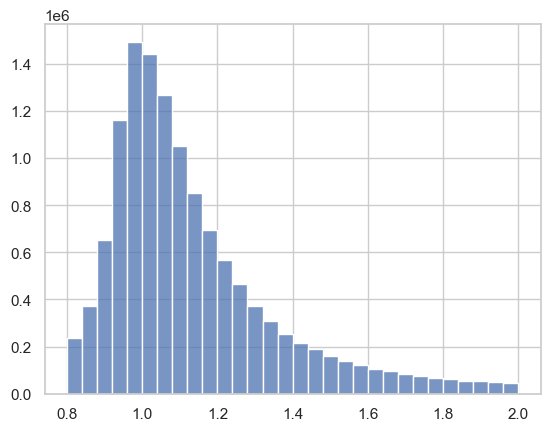

In [9]:
ax = sns.histplot(data, x='Moneyness', bins=30)

ax.set_xlabel('')
ax.set_ylabel('')

Text(0, 0.5, '')

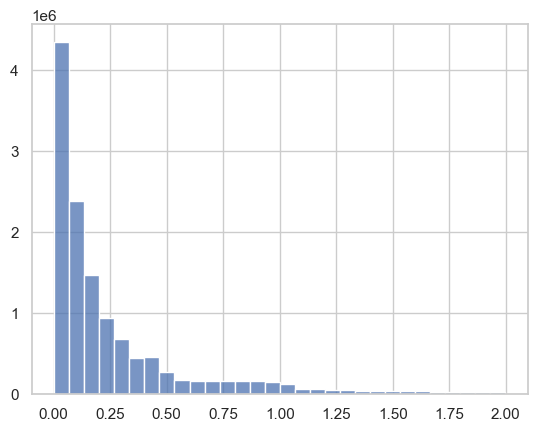

In [10]:
ax = sns.histplot(data, x='TTM', bins=30)

ax.set_xlabel('')
ax.set_ylabel('')

In [12]:
print(data[['Moneyness', 'TTM']].describe().to_latex(float_format="%,.6f"))

ValueError: unsupported format character ',' (0x2c) at index 1

In [50]:
pd.options.display.float_format = '{:,.2f}'.format

In [94]:
data[data['RISK_FREE_RATE'] > 1].describe()

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,TTM,Moneyness,C_PRICE,TIME_IDX,RISK_FREE_RATE
count,"4,005,286.00",4005286,4005286,"4,005,286.00","4,005,286.00",4005286,"4,005,286.00","4,005,286.00","4,005,286.00","4,005,286.00",...,"4,005,286.00","3,513,087.00","2,749,695.00","4,005,286.00","4,005,286.00","4,005,286.00","4,005,286.00","4,005,286.00","4,005,286.00","4,005,286.00"
mean,"1,606,730,987.43",2020-11-30 05:49:47.157471232,2020-11-29 13:49:47.157471488,16.00,"3,432.26",2021-03-20 01:32:14.662742016,"1,616,277,189.15",110.49,0.62,0.00,...,-2.56,0.21,53.11,375.43,0.11,0.30,1.09,337.05,"2,749.54",2.76
min,"1,262,638,800.00",2010-01-04 16:00:00,2010-01-04 00:00:00,16.00,"1,132.99",2011-12-15 00:00:00,"1,323,982,800.00",6.00,0.00,-0.00,...,-102.72,-0.00,0.00,0.00,0.00,0.02,0.80,0.02,0.00,1.00
25%,"1,543,438,800.00",2018-11-28 16:00:00,2018-11-28 00:00:00,16.00,"2,798.30",2019-03-04 00:00:00,"1,551,733,200.00",28.00,0.34,0.00,...,-2.78,0.15,1.00,120.00,0.04,0.08,0.97,45.54,"2,245.00",1.61
50%,"1,578,603,600.00",2020-01-09 16:00:00,2020-01-09 00:00:00,16.00,"3,229.70",2020-05-15 00:00:00,"1,589,572,800.00",58.00,0.74,0.00,...,-0.77,0.20,5.00,268.30,0.08,0.16,1.04,208.10,"2,524.00",2.28
75%,"1,676,062,800.00",2023-02-10 16:00:00,2023-02-10 00:00:00,16.00,"4,077.16",2023-05-19 00:00:00,"1,684,526,400.00",137.04,0.91,0.00,...,-0.08,0.26,23.00,520.80,0.16,0.38,1.16,492.95,"3,304.00",4.02
max,"1,696,017,600.00",2023-09-29 16:00:00,2023-09-29 00:00:00,16.00,"4,631.25",2025-06-20 00:00:00,"1,750,449,600.00",729.00,1.00,3.21,...,0.00,1.43,"83,299.00","2,306.20",0.50,2.00,2.00,"2,450.35","3,463.00",5.81
std,"68,215,095.16",NaN,NaN,0.00,682.64,NaN,"68,856,813.88",128.56,0.33,0.00,...,5.00,0.11,260.55,355.76,0.09,0.35,0.18,384.98,544.98,1.42


In [93]:
data[(data['TTM'] > 0.1) ]['RISK_FREE_RATE'].describe()

count   5,578,678.00
mean            1.50
std             1.74
min            -0.05
25%             0.09
50%             0.56
75%             2.40
max             5.79
Name: RISK_FREE_RATE, dtype: float64

In [85]:
data.describe()

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,TTM,Moneyness,C_PRICE,TIME_IDX,RISK_FREE_RATE
count,"9,846,695.00",9846695,9846695,"9,846,695.00","9,846,695.00",9846695,"9,846,695.00","9,846,695.00","9,846,695.00","9,846,695.00",...,"9,846,695.00","9,110,854.00","6,415,620.00","9,846,695.00","9,846,695.00","9,846,695.00","9,846,695.00","9,846,694.00","9,846,695.00","9,846,695.00"
mean,"1,566,331,074.40",2019-08-20 15:37:00.426446848,2019-08-19 23:37:00.426448128,16.00,"3,218.49",2019-11-25 00:48:17.591447552,"1,574,716,156.58",97.05,0.58,0.00,...,-2.92,0.22,62.00,327.77,0.10,0.27,1.07,278.98,"2,427.00",1.24
min,"1,262,638,800.00",2010-01-04 16:00:00,2010-01-04 00:00:00,16.00,"1,022.47",2010-01-07 00:00:00,"1,262,898,000.00",1.00,0.00,-0.00,...,-129.95,-0.00,0.00,0.00,0.00,0.00,0.80,0.00,0.00,-0.06
25%,"1,513,717,200.00",2017-12-19 16:00:00,2017-12-19 00:00:00,16.00,"2,553.74",2018-02-23 00:00:00,"1,519,419,600.00",20.00,0.24,0.00,...,-2.95,0.14,1.00,99.50,0.03,0.05,0.96,21.26,"2,008.00",0.07
50%,"1,583,870,400.00",2020-03-10 16:00:00,2020-03-10 00:00:00,16.00,"3,108.39",2020-05-29 00:00:00,"1,590,782,400.00",46.04,0.69,0.00,...,-0.78,0.20,5.00,222.60,0.07,0.13,1.03,149.01,"2,565.00",0.44
75%,"1,641,330,000.00",2022-01-04 16:00:00,2022-01-04 00:00:00,16.00,"4,110.92",2022-04-14 00:00:00,"1,649,966,400.00",119.04,0.91,0.00,...,-0.09,0.28,32.00,447.40,0.14,0.33,1.13,400.95,"3,027.00",1.98
max,"1,696,017,600.00",2023-09-29 16:00:00,2023-09-29 00:00:00,16.00,"4,795.57",2025-06-20 00:00:00,"1,750,449,600.00",729.00,1.00,3.21,...,0.00,3.52,"83,299.00","2,393.20",0.50,2.00,2.00,"2,450.35","3,463.00",5.81
std,"96,882,189.28",NaN,NaN,0.00,948.93,NaN,"97,080,644.55",125.83,0.35,0.00,...,5.87,0.15,233.23,325.73,0.09,0.34,0.16,349.63,773.96,1.56


In [17]:
print(data[['C_PRICE', 'STRIKE', 'TTM', 'RISK_FREE_RATE', '30RV', 'Moneyness']].describe().iloc[1:3,:].transpose().to_latex())

\begin{tabular}{lrr}
\toprule
 & mean & std \\
\midrule
C_PRICE & 362.081248 & 399.608231 \\
STRIKE & 2817.774324 & 1039.350532 \\
TTM & 0.255268 & 0.339275 \\
RISK_FREE_RATE & 1.061708 & 1.458660 \\
30RV & 0.009540 & 0.006268 \\
Moneyness & 1.135696 & 0.225410 \\
\bottomrule
\end{tabular}



In [22]:
underlying['RETURNS'].describe().iloc[1:3]

mean    0.044214
std     1.074546
Name: RETURNS, dtype: float64

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_79617/1100952585.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


[Text(0, 0, '<1'),
 Text(1, 0, '<2'),
 Text(2, 0, '<3'),
 Text(3, 0, '<4'),
 Text(4, 0, '<5'),
 Text(5, 0, '<6'),
 Text(6, 0, '<7'),
 Text(7, 0, '<8'),
 Text(8, 0, '<9'),
 Text(9, 0, '<10'),
 Text(10, 0, '<11'),
 Text(11, 0, '<12'),
 Text(12, 0, '<13'),
 Text(13, 0, '<14'),
 Text(14, 0, '<15'),
 Text(15, 0, '<16'),
 Text(16, 0, '<17'),
 Text(17, 0, '<18'),
 Text(18, 0, '<19'),
 Text(19, 0, '<20'),
 Text(20, 0, '<21'),
 Text(21, 0, '<22'),
 Text(22, 0, '<23'),
 Text(23, 0, '<24')]

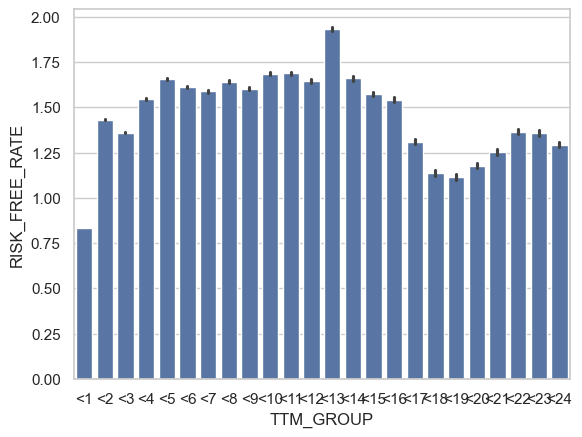

In [129]:
data['TTM_GROUP'] = pd.cut(data['TTM'], 24)

ax = sns.barplot(data, x='TTM_GROUP', y='RISK_FREE_RATE')
xticks = []
for x in ax.get_xticklabels():
    nums = x.get_text().split(',')
    a, b = float(nums[0].strip('()[]')), float(nums[1].strip('()[]'))
    xticks.append(f'<{round(b*12)}')
ax.set_xticklabels(xticks)

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_79617/4004969462.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


[Text(0, 0, '0 - 2'),
 Text(1, 0, '2 - 5'),
 Text(2, 0, '5 - 7'),
 Text(3, 0, '7 - 8'),
 Text(4, 0, '8 - 11'),
 Text(5, 0, '11 - 13'),
 Text(6, 0, '13 - 14'),
 Text(7, 0, '14 - 17'),
 Text(8, 0, '17 - 18'),
 Text(9, 0, '18 - 20'),
 Text(10, 0, '20 - 22'),
 Text(11, 0, '22 - 24')]

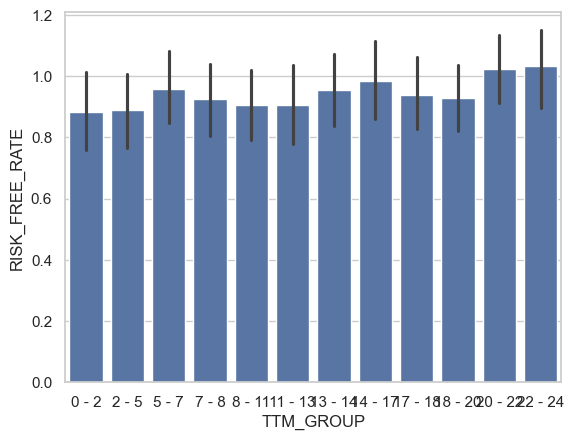

In [124]:
df = pd.DataFrame({'TTM': np.random.rand(1000) * 2, 'RISK_FREE_RATE': np.random.rand(1000) * 2})

df['TTM_GROUP'] = pd.qcut(df['TTM'], 12)

ax = sns.barplot(df, x='TTM_GROUP', y='RISK_FREE_RATE')
xticks = []
for x in ax.get_xticklabels():
    nums = x.get_text().split(',')
    a, b = float(nums[0].strip('()[]')), float(nums[1].strip('()[]'))
    xticks.append(f'{round(a*12)} - {round(b*12)}')
ax.set_xticklabels(xticks)

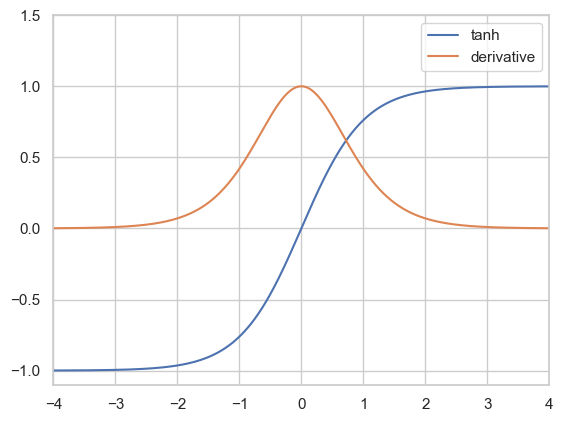

In [166]:
x = np.arange(-4, 4, 0.01)

tanh = np.array([np.tanh(a) for a in x])
tanh_d = np.array([1 - np.tanh(a)**2 for a in x])

df = pd.DataFrame({'x': x, 'tanh': tanh, 'derivative': tanh_d})

ax = sns.lineplot(pd.melt(df, ['x']), x='x', y='value', hue='variable')
ax.legend().set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xbound(-4, 4)
ax.set_ybound(-1.1, 1.5)